<a href="https://colab.research.google.com/github/Blf100/Analise-de-dados-Netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Netflix


### Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

### Importando os Dados

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/netflix daily top 10.csv')

### Primeiras Impressões Sobre os Dados

In [ ]:
# Primeiras Linhas do Dataset
base.head(5)

,A partir de,Classificacao,Classificaçao do ano ate a data,Classificaçao da ultima semana,Titulo,Tipo,Exclusivo Netflix,Data de lancamento Netflix,Dias no Top 10,Pontuaçao de audiencia
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,Not,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,Not,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [ ]:
# Ultimas Linhas do Dataset
base.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


In [ ]:
# Alterando Nome das Colunas
base.columns = ['A partir de', 'Classificacao', 'Classificaçao do ano ate a data', 'Classificaçao da ultima semana', 'Titulo', 'Tipo',
       'Exclusivo Netflix', 'Data de lancamento Netflix', 'Dias no Top 10',
       'Pontuaçao de audiencia']

In [ ]:
# Tamanho do Dataset
base.shape

(7100, 10)

In [ ]:
# Informações Gerais Sobre o Dataset
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   A partir de                      7100 non-null   object
 1   Classificacao                    7100 non-null   int64 
 2   Classificaçao do ano ate a data  7100 non-null   object
 3   Classificaçao da ultima semana   7100 non-null   object
 4   Titulo                           7100 non-null   object
 5   Tipo                             7100 non-null   object
 6   Exclusivo Netflix                4599 non-null   object
 7   Data de lancamento Netflix       7100 non-null   object
 8   Dias no Top 10                   7100 non-null   int64 
 9   Pontuaçao de audiencia           7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [ ]:
# Contando Valores Nulos
base.isnull().sum()

A partir de                           0
Classificacao                         0
Classificaçao do ano ate a data       0
Classificaçao da ultima semana        0
Titulo                                0
Tipo                                  0
Exclusivo Netflix                  2501
Data de lancamento Netflix            0
Dias no Top 10                        0
Pontuaçao de audiencia                0
dtype: int64

#### Limpeza e tratamento dos dados

In [ ]:
# Etendendo os Valores Nulos da Coluna Netflix Exclusive
base['Exclusivo Netflix'].value_counts()

Yes    4599
Name: Exclusivo Netflix, dtype: int64

In [ ]:
# Tratando Valores Ausentes
base['Exclusivo Netflix'].fillna('Not', inplace= True)

In [ ]:
# Ecluindo colunas indesejadas
base.drop(columns=['A partir de', 'Classificaçao do ano ate a data', 'Classificaçao da ultima semana', 'Data de lancamento Netflix'], inplace=True)

### Estatísticas Descritivas

#### Resumo dos dados

In [ ]:
base.describe()

,Classificacao,Dias no Top 10,Pontuaçao de audiencia
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


#### Histograma da variável Dias no Top 10

In [ ]:
# Histograma Dias no Top 10
px.histogram(base, x='Dias no Top 10', width=500, height=500)

#### Histograma da variável Pontuação de Audiência

In [ ]:
px.histogram(base, x='Pontuaçao de audiencia', width=500, height=500)

#### Boxplot da variável Pontuação de Audiência

In [ ]:
# Boxplot de Pontuação de Audiência
px.box(base, y='Pontuaçao de audiencia', width=500, height=500)

#### Quais os títulos tem maiores médias de dias no top 10?

In [ ]:
# Média de Dias no Top 10
media_dias_top10 = base.groupby('Titulo').agg(
                                              {'Dias no Top 10': np.mean}).sort_values(
                                              by='Dias no Top 10', ascending=False).iloc[0:10,].reset_index()


px.bar(media_dias_top10, x='Titulo', y='Dias no Top 10', color='Titulo', width=800, height=400)

#### Quais os tipos de atrações?

In [ ]:
base['Tipo'].value_counts()

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Tipo, dtype: int64

#### Qual a quantidade de atrações são exclusivos da Netflix?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



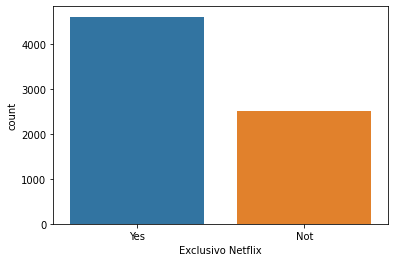

In [ ]:
# Contando Quantos Títulos São exclusivos da Netflix
base['Exclusivo Netflix'].value_counts()

# Plotando exclusivos netflix
sns.countplot(base['Exclusivo Netflix']);

#### Os títulos exclusivos Netflix tem em média mais dias no top 10?

In [ ]:
# Média de dias no top 10 que saõ exclusivos netflix
media_top10_exclusivo = base.groupby('Exclusivo Netflix').agg(
                                                              {'Dias no Top 10' : np.mean}).reset_index()
media_top10_exclusivo.columns = ['Exclusivo Netflix', 'Média de dias no top 10']

px.bar(media_top10_exclusivo, x='Exclusivo Netflix', y='Média de dias no top 10', 
                                                      color='Exclusivo Netflix', width=800, height=400)

#### Quais as médias de audiência para títilos que são ou não exclusivos Netflix?

In [ ]:
# Média de Audiência Para Títulos Exclusivos Netflix
audiencia_media_exclisivo = base.groupby('Exclusivo Netflix').agg({'Pontuaçao de audiencia':np.mean}).reset_index()

# Plotando Média de Audiência Para Titulos Que são ou não exclusivos netFlix
px.bar(audiencia_media_exclisivo, x='Exclusivo Netflix', y='Pontuaçao de audiencia', 
                                                         color='Exclusivo Netflix', width=800, height=400)

#### Quais as médias de audiência para cada tipo de atração?

In [ ]:
# Média de audiência por categoria de Atração
media_top10_categoria_atracao = base.groupby('Tipo').agg(
                                                        {'Pontuaçao de audiencia':np.mean}).sort_values(
                                                        by='Pontuaçao de audiencia', ascending=False).reset_index()

px.bar(media_top10_categoria_atracao, x='Tipo', y='Pontuaçao de audiencia', color='Tipo', width=650, height=450)                                                       

#### Quais o títulos que ficaram mais dias em primeiro lugar?

In [ ]:
# Títulos Que mais ficaram em primeiro lugar
primeiros = base[base['Classificacao'] == 1]
top10_dias_em_primeiro = primeiros['Titulo'].value_counts()
top10_dias_em_primeiro = pd.DataFrame(top10_dias_em_primeiro).reset_index()
top10_dias_em_primeiro = top10_dias_em_primeiro.iloc[0:10,]
top10_dias_em_primeiro.columns = ['Título', 'Dias em Primeiro Lugar']

px.bar(top10_dias_em_primeiro, x='Título', y='Dias em Primeiro Lugar', color='Título')